Multinomial Logistic Regression - HeartDiseasePredictor

In [7]:
#importing dependencies 
from audioop import cross # type: ignore
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import GradientBoostingClassifier # type: ignore
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV # type: ignore

C:\Users\user\AppData\Local\Temp\ipykernel_10700\1923174754.py:2: DeprecationWarning: 'audioop' is deprecated and slated for removal in Python 3.13
  from audioop import cross # type: ignore


In [2]:
data = pd.read_csv('heart.csv')

Data Processing 

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
data['target'] = data['target'].apply(lambda x:1 if x==True else 0)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
data.shape

(1025, 14)

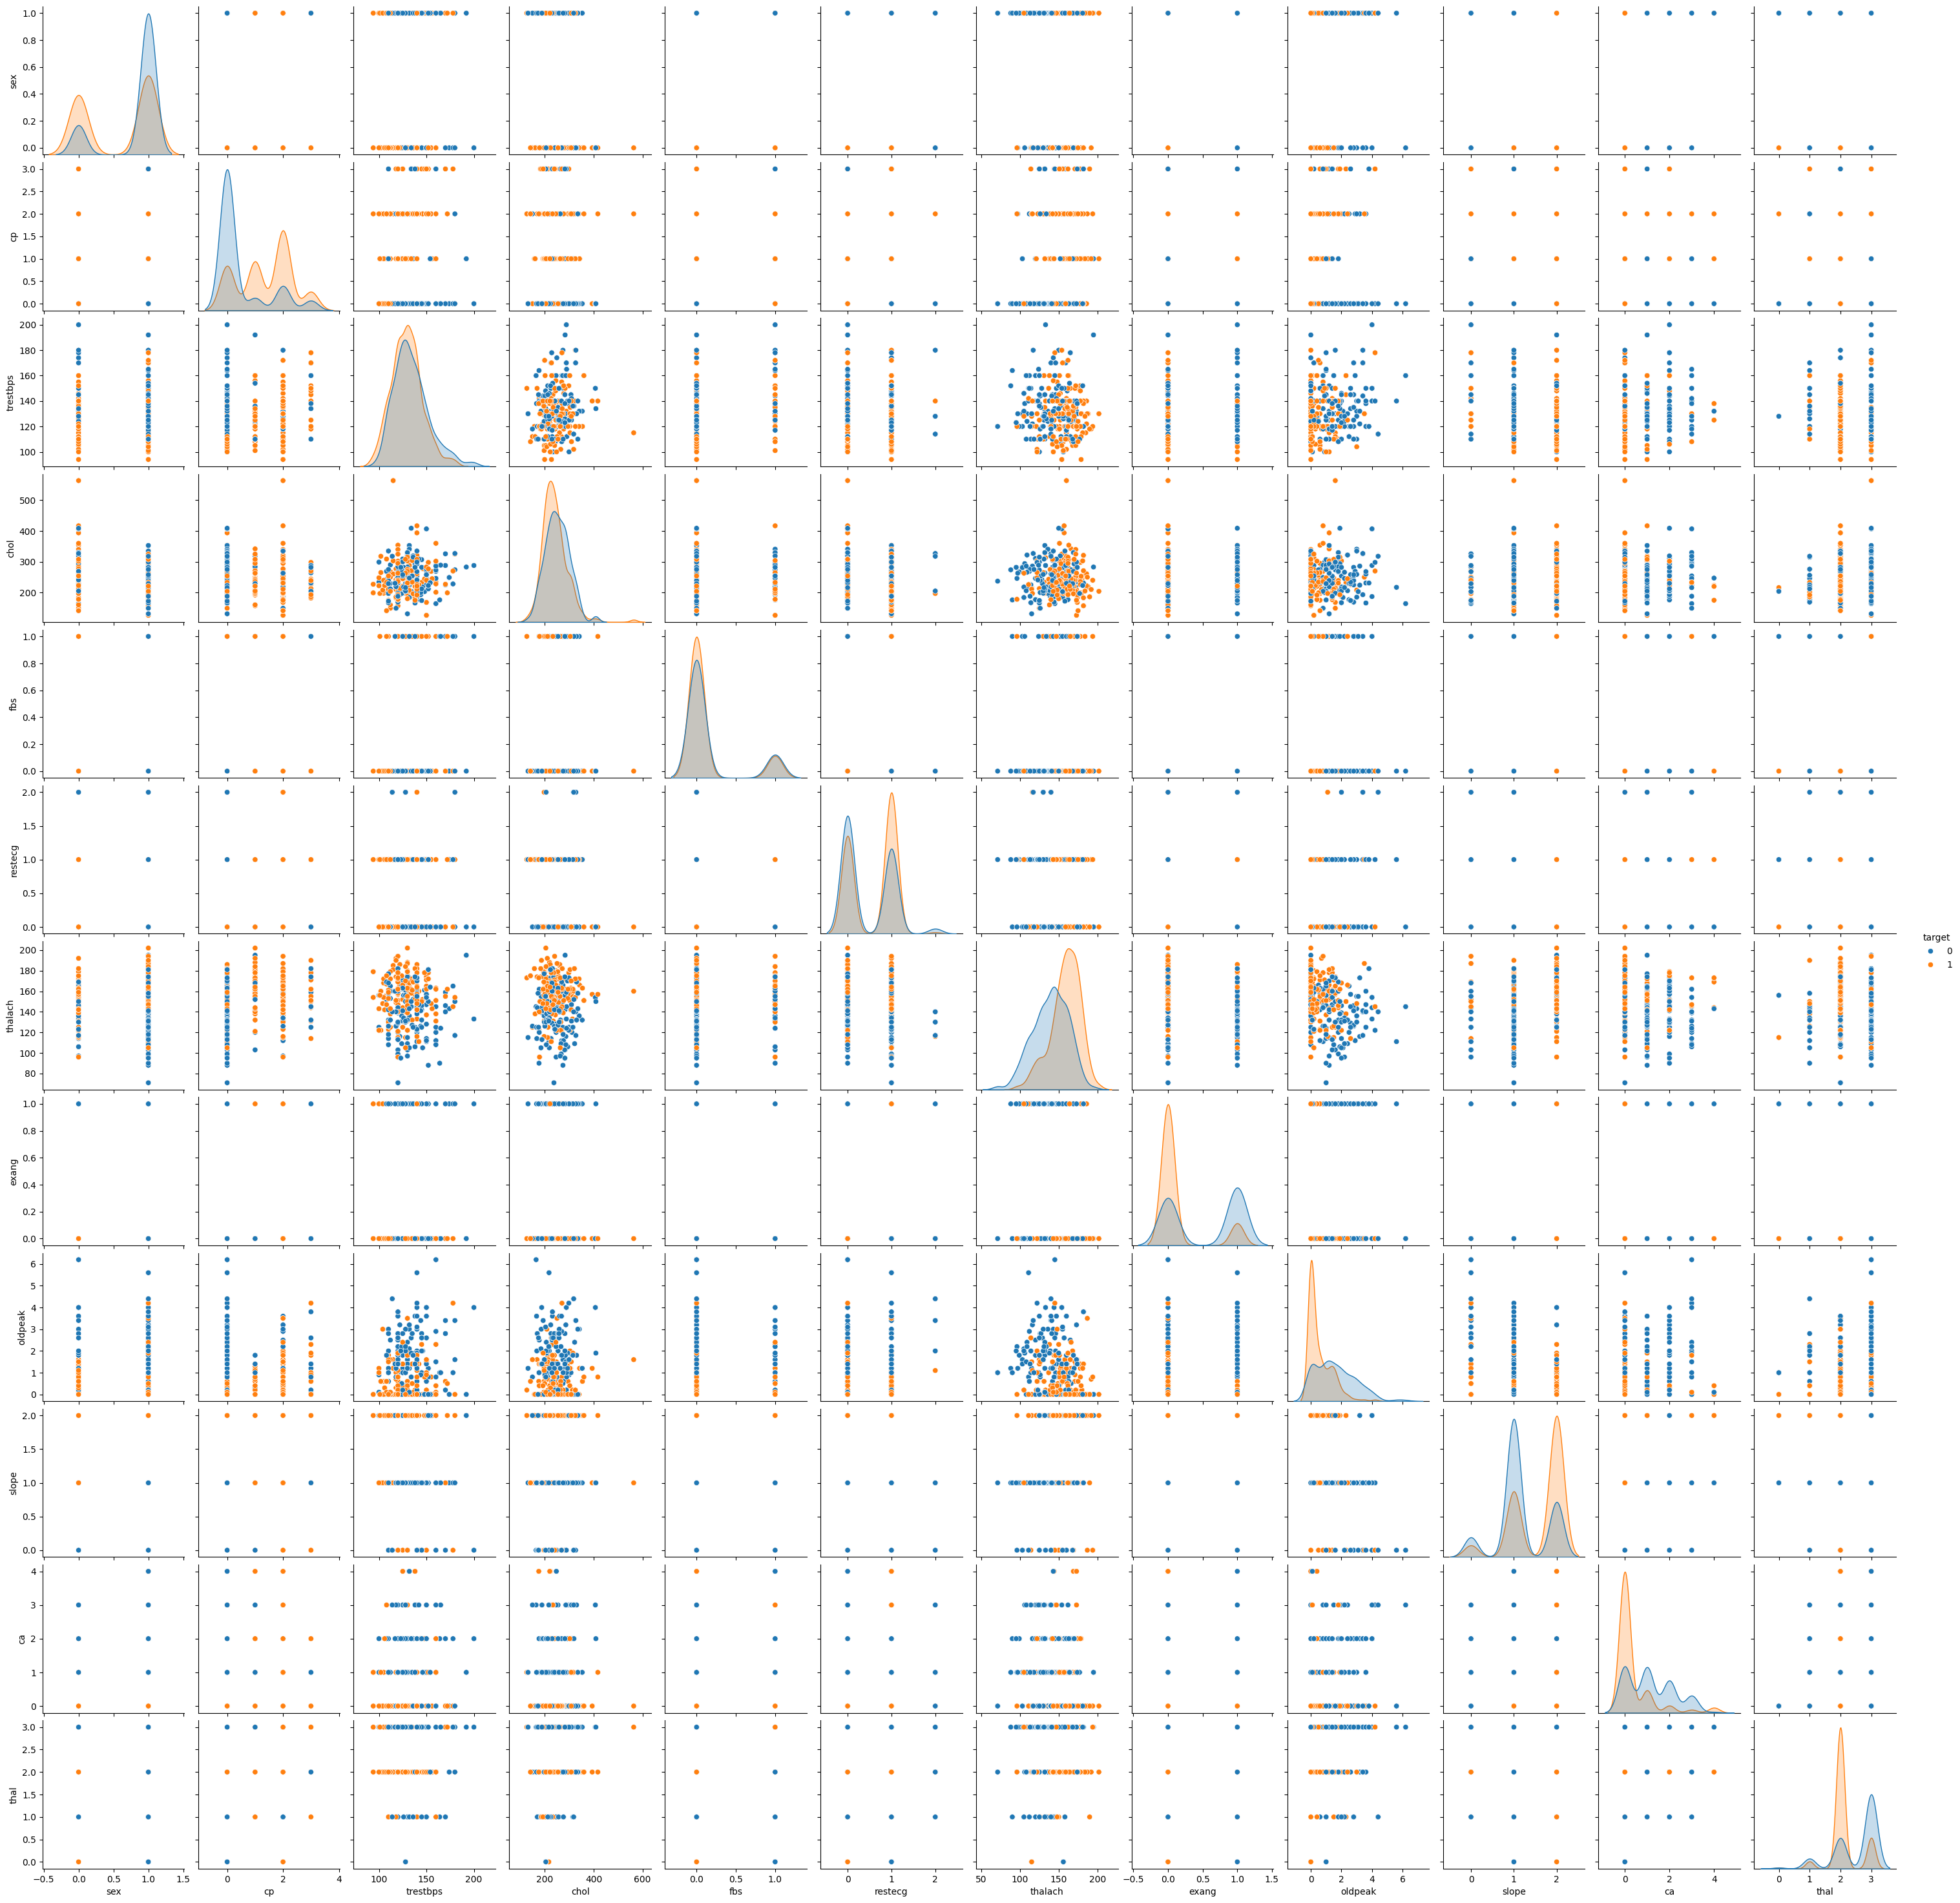

In [8]:
sns.pairplot(data, hue='target', vars=data.columns[1:-1])

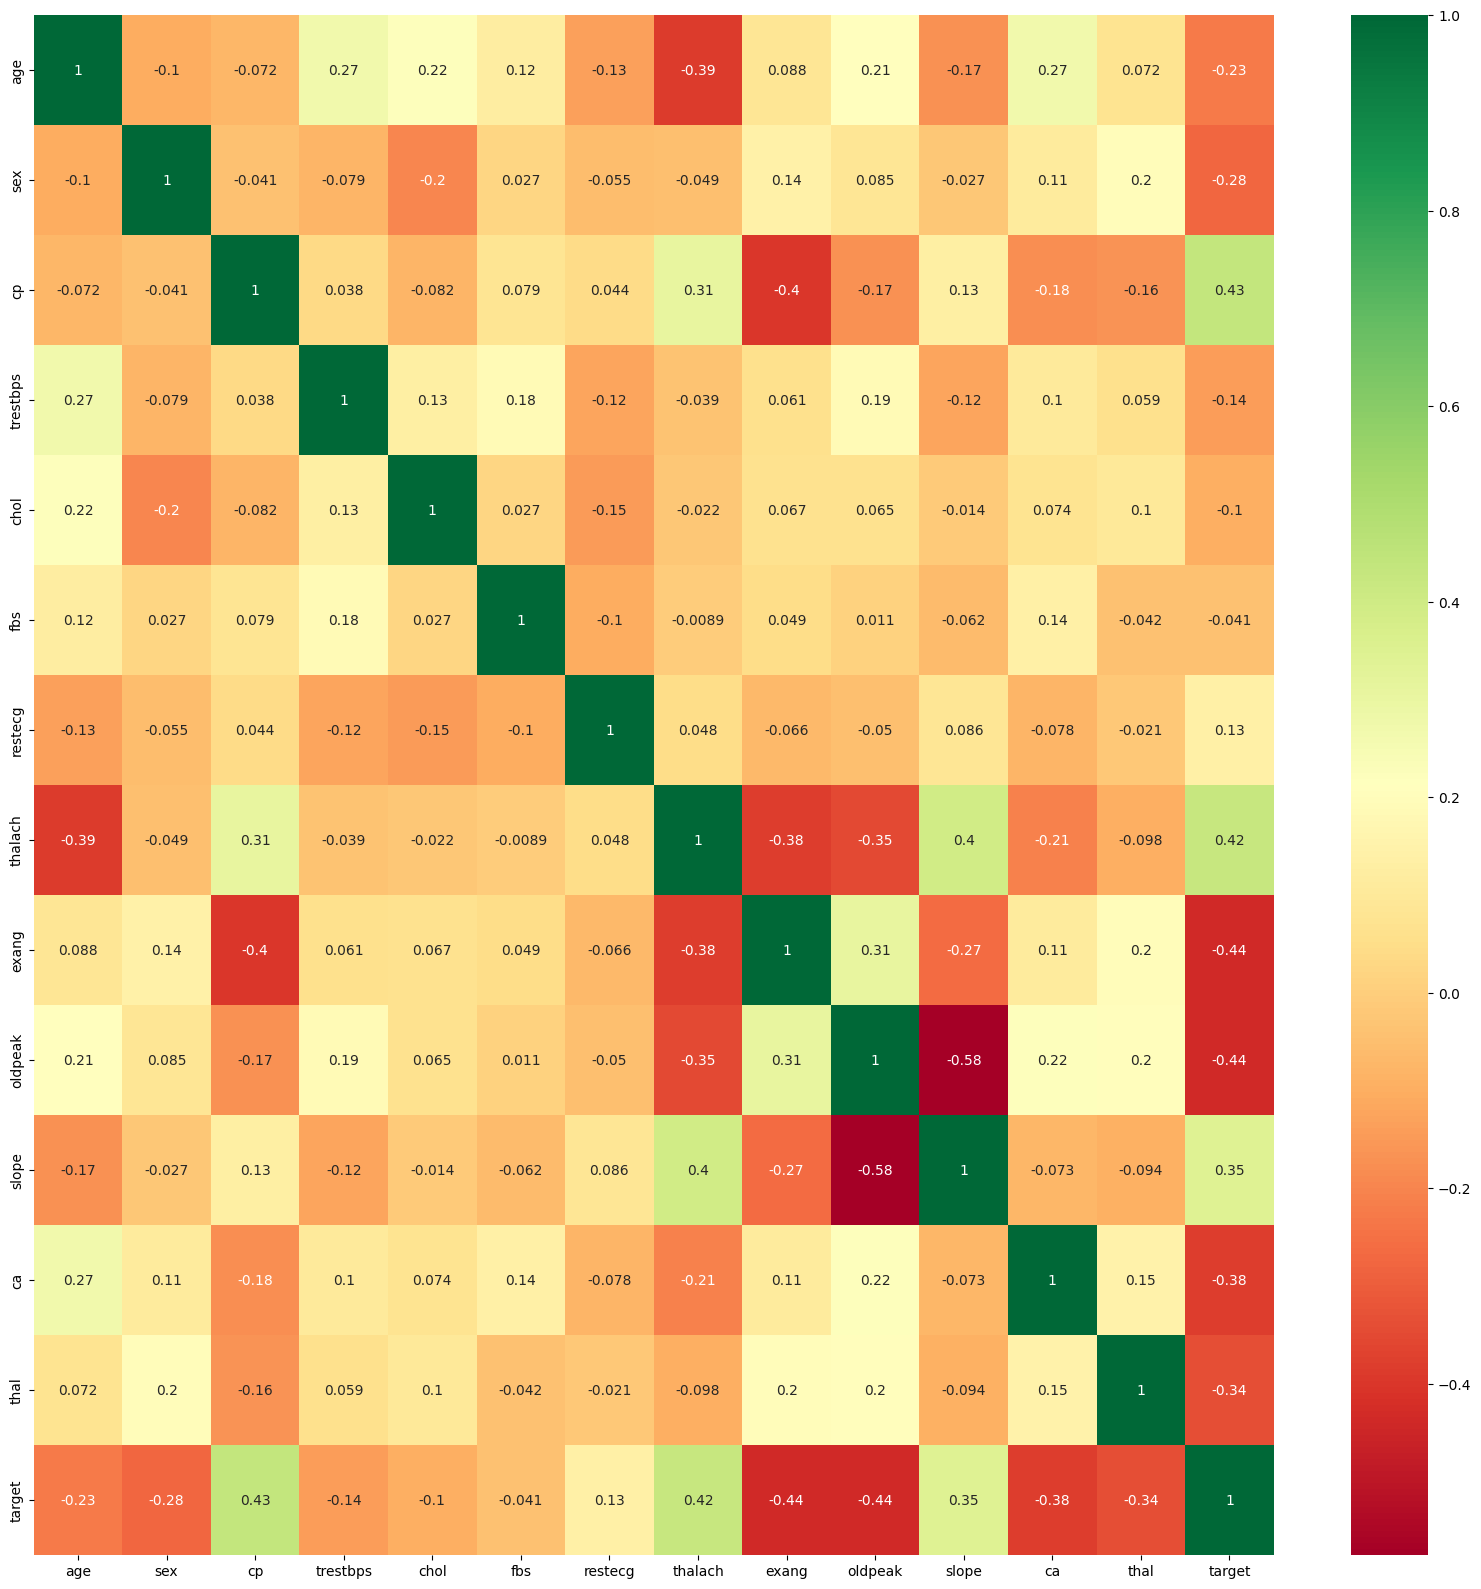

In [9]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Formulating the model 

<Axes: ylabel='count'>

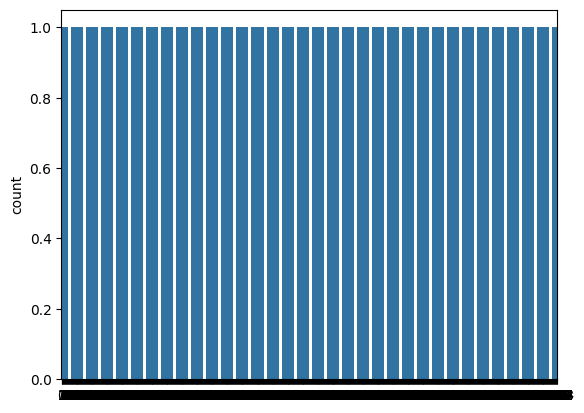

In [10]:
sns.countplot(data['target'])

In [11]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [12]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing age: {0}".format(len(data.loc[data['age'] == 0])))
print("number of rows missing sex: {0}".format(len(data.loc[data['sex'] == 0])))
print("number of rows missing cp: {0}".format(len(data.loc[data['cp'] == 0])))
print("number of rows missing trestbps: {0}".format(len(data.loc[data['trestbps'] == 0])))
print("number of rows missing chol: {0}".format(len(data.loc[data['chol'] == 0])))
print("number of rows missing fbs: {0}".format(len(data.loc[data['fbs'] == 0])))
print("number of rows missing restecg: {0}".format(len(data.loc[data['restecg'] == 0])))
print("number of rows missing thalach: {0}".format(len(data.loc[data['thalach'] == 0])))
print("number of rows missing exang: {0}".format(len(data.loc[data['exang'] == 0])))
print("number of rows missing oldpeak: {0}".format(len(data.loc[data['oldpeak'] == 0])))
print("number of rows missing slope: {0}".format(len(data.loc[data['slope'] == 0])))
print("number of rows missing ca: {0}".format(len(data.loc[data['ca'] == 0])))
print("number of rows missing thal: {0}".format(len(data.loc[data['thal'] == 0])))

total number of rows : 1025
number of rows missing age: 0
number of rows missing sex: 312
number of rows missing cp: 497
number of rows missing trestbps: 0
number of rows missing chol: 0
number of rows missing fbs: 872
number of rows missing restecg: 497
number of rows missing thalach: 0
number of rows missing exang: 680
number of rows missing oldpeak: 329
number of rows missing slope: 74
number of rows missing ca: 578
number of rows missing thal: 7


In [13]:
na_columns = ['cp','thalach','oldpeak','slope','ca']
data[na_columns] = data[na_columns].replace(0,np.nan)

In [14]:
df = data.copy()

for column in ['cp', 'thalach', 'oldpeak']:
    median_0 = data[column][data['target']==0].median()
    median_1 = data[column][data['target']==1].median()

df.loc[df['target'] == 0, column] = data.loc[df['target'] == 0, column].fillna(median_0)
df.loc[df['target'] == 1, column] = data.loc[df['target'] == 1, column].fillna(median_1)


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,NaN,125,212,0,1,168,0,1.0,2.0,2.0,3,0
1,53,1,NaN,140,203,1,0,155,1,3.1,NaN,NaN,3,0
2,70,1,NaN,145,174,0,1,125,1,2.6,NaN,NaN,3,0
3,61,1,NaN,148,203,0,1,161,0,1.8,2.0,1.0,3,0
4,62,0,NaN,138,294,1,1,106,0,1.9,1.0,3.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1.0,140,221,0,1,164,1,0.9,2.0,NaN,2,1
1021,60,1,NaN,125,258,0,0,141,1,2.8,1.0,1.0,3,0
1022,47,1,NaN,110,275,0,0,118,1,1.0,1.0,1.0,2,0
1023,50,0,NaN,110,254,0,0,159,0,0.9,2.0,NaN,2,1


In [16]:
df["ca"] = df["ca"].fillna(df["ca"].median())
df["slope"] = df["slope"].fillna(df["slope"].median())

In [17]:
X = df.drop('target',axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,NaN,125,212,0,1,168,0,1.0,2.0,2.0,3
1,53,1,NaN,140,203,1,0,155,1,3.1,1.0,1.0,3
2,70,1,NaN,145,174,0,1,125,1,2.6,1.0,1.0,3
3,61,1,NaN,148,203,0,1,161,0,1.8,2.0,1.0,3
4,62,0,NaN,138,294,1,1,106,0,1.9,1.0,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1.0,140,221,0,1,164,1,0.9,2.0,1.0,2
1021,60,1,NaN,125,258,0,0,141,1,2.8,1.0,1.0,3
1022,47,1,NaN,110,275,0,0,118,1,1.0,1.0,1.0,2
1023,50,0,NaN,110,254,0,0,159,0,0.9,2.0,1.0,2


Model Optimization

In [18]:
y = df.target
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

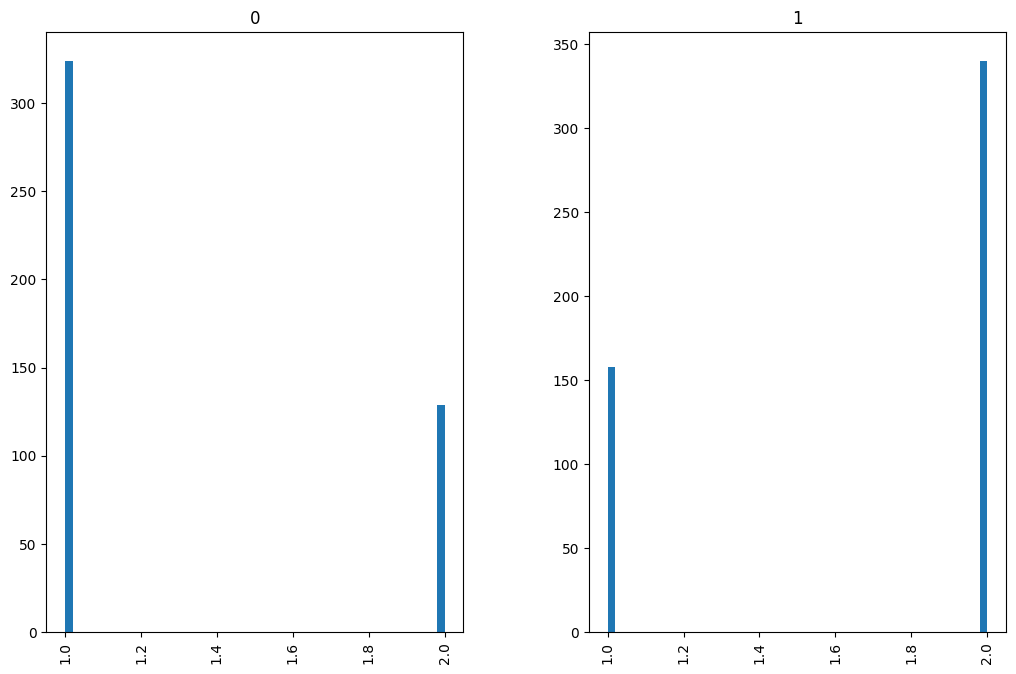

In [19]:
data.hist(column='slope', bins=50, by='target', figsize=(12,8))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

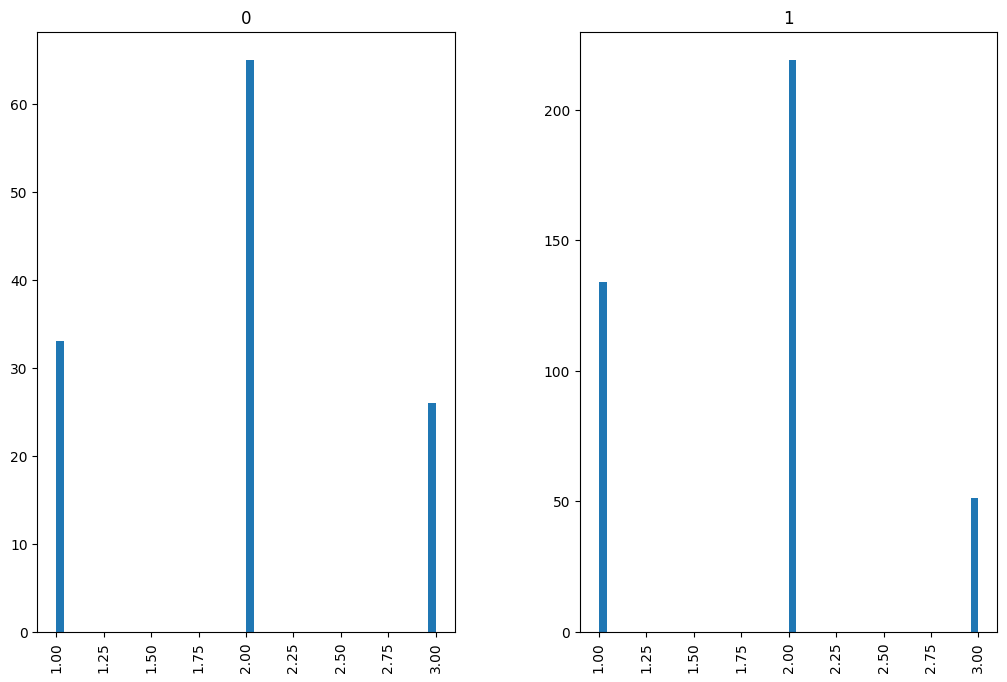

In [20]:
data.hist(column='cp', bins=50, by='target', figsize=(12,8))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

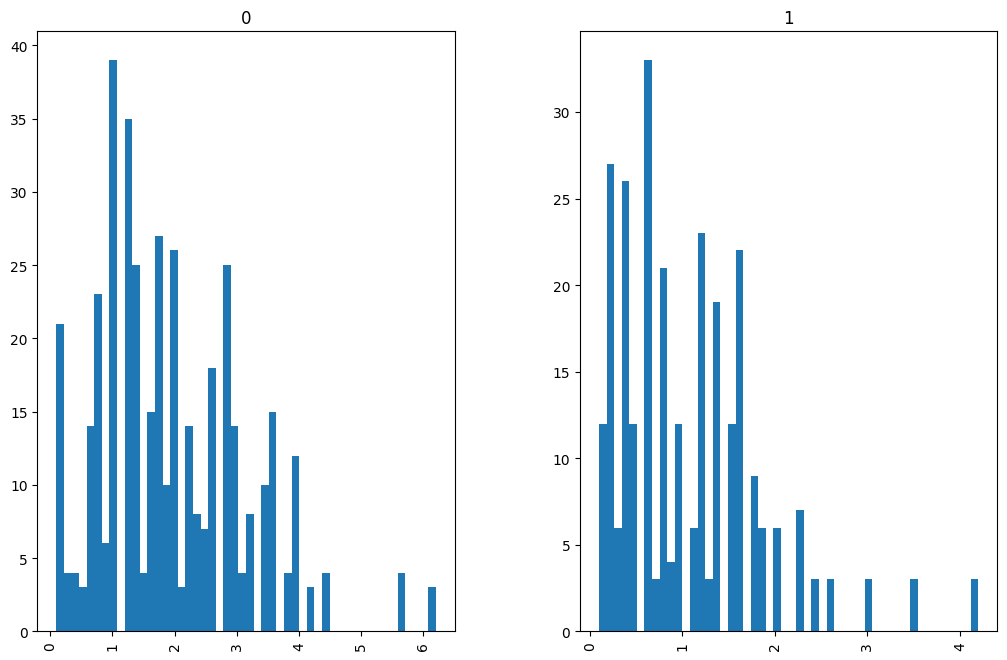

In [21]:
data.hist(column='oldpeak', bins=50, by='target', figsize=(12,8))

Creating metrics for evaluation

In [23]:
from sklearn import metrics
f1 = metrics.make_scorer(metrics.f1_score)
accuracy = metrics.make_scorer(metrics.accuracy_score)
precision = metrics.make_scorer(metrics.precision_score)
recall = metrics.make_scorer(metrics.recall_score)
auc = metrics.make_scorer(metrics.roc_auc_score)

In [24]:
scoring = {
    "accuracy":accuracy,
    "precision":precision,
    "recall": recall,
    "f1":f1,
}

In [25]:
def printResults(cv):
    print("Accuracy  {:.3f} ({:.3f})".format(cv["test_accuracy"].mean(), cv["test_accuracy"].std()))
    print("Precision {:.3f} ({:.3f})".format(cv["test_precision"].mean(), cv["test_precision"].std()))
    print("Recall    {:.3f} ({:.3f})".format(cv["test_recall"].mean(), cv["test_recall"].std()))
    print("F1        {:.3f} ({:.3f})".format(cv["test_f1"].mean(), cv["test_f1"].std()))

Creating the model

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [29]:
gbc = GradientBoostingClassifier()

In [31]:
from  sklearn.impute import SimpleImputer

#creating an imputer 
imputer = SimpleImputer(strategy='mean')

#fit on training the data and transform both train & test sets
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

#convert back to a DataFrame 
import pandas as pd
X_train = pd.DataFrame(X_train, columns=["age", "sex", "cp", "trestbps",
                                         "chol", "fbs", "restecg", "thalach","exang","oldpeak","slope","ca","thal"])
X_test = pd.DataFrame(X_test, columns=["age", "sex", "cp", "trestbps",
                                         "chol", "fbs", "restecg", "thalach","exang","oldpeak","slope","ca","thal"])

In [33]:
print(X_train.isnull().sum()) 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


In [35]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [37]:
y_pred = gbc.predict(X_test)

In [39]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       123
           1       0.98      0.99      0.98       134

    accuracy                           0.98       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.98      0.98      0.98       257



<Axes: >

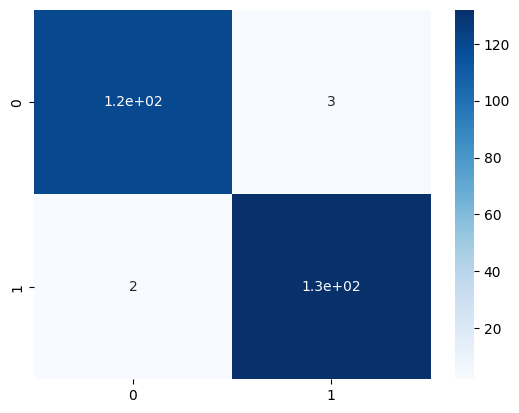

In [41]:
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")

In [43]:
cv_gbc = cross_validate(gbc, X_train, y_train, scoring=scoring, cv=5)

In [44]:
printResults(cv_gbc)

Accuracy  0.962 (0.020)
Precision 0.970 (0.031)
Recall    0.957 (0.026)
F1        0.963 (0.019)
